# Follow-Along Activity

In [ ]:
import pandas as pd
from google.colab import files
import statsmodels.api as sm

uploaded = files.upload()
df = pd.read_csv("7.2_data.csv")
print(df.head())

Saving 7.2_data.csv to 7.2_data.csv
         Date    Revenue
0  2020-01-31  204967.14
1  2020-02-29  201808.85
2  2020-03-31  212859.86
3  2020-04-30  224804.77
4  2020-05-31  210424.42


In [ ]:
df["Revenue_Lag1"] = df["Revenue"].shift(1)
df["Revenue_Lag2"] = df["Revenue"].shift(2)
df.dropna(inplace=True)
print(df.head())


         Date    Revenue  Revenue_Lag1  Revenue_Lag2
2  2020-03-31  212859.86     201808.85     204967.14
3  2020-04-30  224804.77     212859.86     201808.85
4  2020-05-31  210424.42     224804.77     212859.86
5  2020-06-30  213616.08     210424.42     224804.77
6  2020-07-31  234941.06     213616.08     210424.42


In [ ]:
Y = df["Revenue"]
X = df[["Revenue_Lag1", "Revenue_Lag2"]]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     283.6
Date:                Sun, 27 Jul 2025   Prob (F-statistic):           1.70e-25
Time:                        10:52:28   Log-Likelihood:                -494.04
No. Observations:                  46   AIC:                             994.1
Df Residuals:                      43   BIC:                             999.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7328.4180   1.14e+04      0.642   

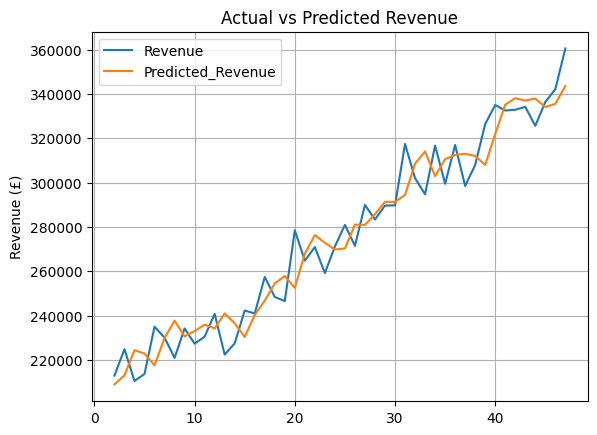

In [ ]:
df["Predicted_Revenue"] = model.predict(X)
ax = df[["Revenue", "Predicted_Revenue"]].plot(title="Actual vs Predicted Revenue", grid=True)
ax.set_ylabel("Revenue (£)")

# Save the figure as a JPEG for textbook publication
import matplotlib.pyplot as plt
plt.savefig("Actual vs Predicted Revenue.jpeg", dpi=300, format='jpeg', bbox_inches='tight')

In [ ]:
latest_lag1 = df["Revenue"].iloc[-1]
latest_lag2 = df["Revenue"].iloc[-2]
latest_data = pd.DataFrame({
    "const": [1],
    "Revenue_Lag1": [latest_lag1],
    "Revenue_Lag2": [latest_lag2]
})

forecast = model.predict(latest_data)
print(f"Forecasted revenue for next month: £{forecast.values[0]:,.2f}")


Forecasted revenue for next month: £355,814.22


# Your Project

Saving 7.2_your_project.csv to 7.2_your_project.csv
         Date  Units_Sold
0  2023-08-06          85
1  2023-08-13          80
2  2023-08-20          89
3  2023-08-27          99
4  2023-09-03          83
         Date  Units_Sold  Units_Sold_Lag1  Units_Sold_Lag2
2  2023-08-20          89             80.0             85.0
3  2023-08-27          99             89.0             80.0
4  2023-09-03          83             99.0             89.0
5  2023-09-10          85             83.0             99.0
6  2023-09-17         104             85.0             83.0
                            OLS Regression Results                            
Dep. Variable:             Units_Sold   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     4.964
Date:                Sun, 27 Jul 2025   Prob (F-statistic):             0.0153
Time:                        11:00:31

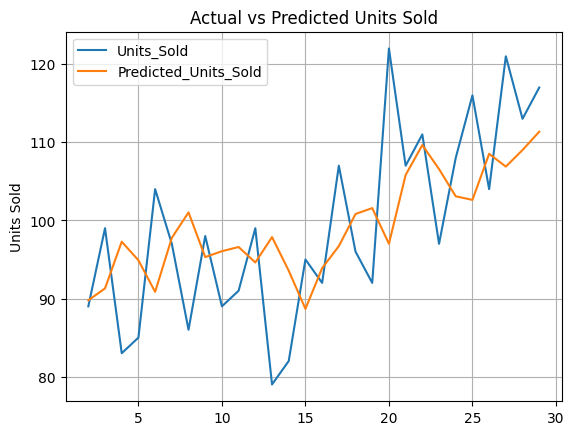

In [ ]:
# Import required libraries
import pandas as pd
from google.colab import files
import statsmodels.api as sm

# Upload and load the dataset
uploaded = files.upload()
df = pd.read_csv("7.2_your_project.csv")
print(df.head())

# Create lagged variables: sales from 1 and 2 weeks earlier
df["Units_Sold_Lag1"] = df["Units_Sold"].shift(1)
df["Units_Sold_Lag2"] = df["Units_Sold"].shift(2)

# Remove rows with missing lag values
df.dropna(inplace=True)
print(df.head())

# Define response and predictor variables
Y = df["Units_Sold"]
X = df[["Units_Sold_Lag1", "Units_Sold_Lag2"]]
X = sm.add_constant(X)  # Add constant (intercept) to the model

# Fit the OLS regression model
model = sm.OLS(Y, X).fit()
print(model.summary())

# Generate predictions for the in-sample period
df["Predicted_Units_Sold"] = model.predict(X)

# Plot actual vs predicted units sold
ax = df[["Units_Sold", "Predicted_Units_Sold"]].plot(
    title="Actual vs Predicted Units Sold", grid=True
)
ax.set_ylabel("Units Sold")

# Forecast units sold for the next week using the latest lagged values
latest_lag1 = df["Units_Sold"].iloc[-1]
latest_lag2 = df["Units_Sold"].iloc[-2]
latest_data = pd.DataFrame({
    "const": [1],
    "Units_Sold_Lag1": [latest_lag1],
    "Units_Sold_Lag2": [latest_lag2]
})

forecast = model.predict(latest_data)
print(f"Forecasted units sold for next week: {forecast.values[0]:.0f}")
